In [2]:
# to read and wrangle data
import pandas as pd

# to import data from LA Data portal
from sodapy import Socrata

# to create spatial data
import geopandas as gpd

# for basemaps
import contextily as ctx

# For spatial statistics
import esda
from esda.moran import Moran, Moran_Local

import splot
from splot.esda import moran_scatterplot, plot_moran, lisa_cluster,plot_moran_simulation

import libpysal as lps

# Graphics
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
housing_survey = pd.read_csv(r'data\GeoJson\tab\CHS2021ECL_PUMF.csv')

In [4]:
housing_survey.shape

(40988, 109)

In [5]:
housing_survey.columns

Index(['PUMFID', 'EHA_10', 'EHA_10A', 'EHA_10B', 'EHA_25', 'DWS_05A',
       'DWI_05A', 'DWI_05B', 'DWI_05C', 'DWI_05D',
       ...
       'PRSPIMST', 'PSCR_05', 'PSCR_10', 'PSCR_25', 'PSCR_35', 'PSCR_D40',
       'PSTIR_GR', 'PVISMIN', 'PWSA_D15', 'VERDATE'],
      dtype='object', length=109)

In [6]:
housing_survey['PGEOGR'].values

array([ 3, 26, 22, ..., 24,  5, 24], dtype=int64)

In [7]:
sub = housing_survey[housing_survey['PGEOGR']==23]

In [8]:
sub['PGEOGR'].unique()

array([23], dtype=int64)

In [9]:
pd.set_option('display.max_columns', None)
sub.head(20)


,PUMFID,EHA_10,EHA_10A,EHA_10B,EHA_25,DWS_05A,DWI_05A,DWI_05B,DWI_05C,DWI_05D,NES_05A,NSC_30A,NSC_30B,NSC_30C,NEI_05A,NEI_05B,NEI_05C,NEI_05D,NEI_05E,NEI_05F,NEI_05G,NEI_05H,NEI_05I,WSA_05,SDH_05,CER_05,CER_20,LIS_10,COS_10,COS_15,GH_05,GH_10,REGION,PAGEGR1,PAGEGR2,PAGEGR3,PAGEGR4,PAGEP1,PCER_10,PCER_15,PCHN,PCOS_05,PDCLASS,PDCT_05,PDCT_20,PDCT_25,PDTYPER,PDV_SAH,PDV_SHCO,PDV_SUIT,PDWLTYPE,PDWS_05,PDWS_10A,PDWS_10B,PDWS_10C,PDWS_10D,PDWS_10E,PDWS_10F,PDWS_10G,PDWS_10H,PDWS_10I,PDWS_10J,PEHA_05A,PEHA_05B,PEHA_05C,PEMPL,PFTHB5YR,PFWEIGHT,PGEOGR,PHGEDUC,PHHSIZE,PHHTTINC,PHTYPE,PLIS_05,PNES_05,PNSC_15,POWN_20,POWN_80,PPAC_05,PPAC_10,PPAC_23,PPAC_30,PPAC_35,PPAC_45A,PPAC_45C,PPAC_45D,PPAC_45E,PPAC_45F,PPAC_45G,PPAC_45H,PPAC_45I,PPAC_45J,PPAC_45K,PPAC_45L,PPAC_45M,PPAC_45N,PPAC_45O,PPROV,PRSPGNDR,PRSPIMST,PSCR_05,PSCR_10,PSCR_25,PSCR_35,PSCR_D40,PSTIR_GR,PVISMIN,PWSA_D15,VERDATE
81,63582,3,6,6,2,2,2,2,2,2,2,3,1,3,2,4,4,2,4,3,3,4,2,2,2,2,2,2,3,2,3,3,4,2,2,1,2,2,96,6,2,7,0,1,2,2,0,6,500.00,1,2,2,4,2,1,1,3,2,2,4,4,4,2,2,2,1,2,885.3046,23,7,2,150000,2,5,2,2,2,99999996,4,2,2,1,6,2,2,2,2,2,2,2,2,2,2,2,2,2,1,48,1,1,6,6,96,6,999.6,1,2,999.6,30/11/2022
100,63601,2,6,1,1,1,2,2,2,2,1,2,1,2,4,4,4,4,4,4,4,4,4,2,2,2,3,2,3,2,3,2,4,2,2,1,2,3,96,6,2,7,0,2,2,1,0,2,1600.00,1,6,3,2,2,3,2,2,2,1,2,2,2,1,2,2,1,6,672.1622,23,7,2,52500,2,5,3,2,6,99999996,4,2,1,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,48,1,2,2,2,3,6,999.6,2,1,999.6,30/11/2022
163,63664,1,1,6,1,3,2,2,2,2,3,1,1,1,4,4,4,4,4,4,4,4,4,2,2,1,3,2,2,2,5,4,4,2,2,1,2,3,2,1,2,4,2,2,2,1,3,2,1600.00,1,6,3,1,1,4,1,2,1,1,3,4,4,1,1,1,2,6,262.1698,23,4,1,60000,5,1,3,1,6,99999996,2,1,6,1,6,2,2,2,2,2,1,2,2,2,2,2,2,2,2,48,1,1,2,2,3,6,999.6,2,2,999.6,30/11/2022
283,63784,2,6,1,2,3,2,1,2,2,2,3,2,3,4,4,2,4,4,2,4,4,4,2,1,2,3,2,9,4,1,1,4,2,2,1,2,3,96,6,2,1,1,1,3,1,9,9,9999999.99,1,1,1,2,2,2,2,2,3,2,4,2,2,2,2,2,1,2,552.9252,23,7,2,125000,3,1,1,2,1,250000,4,1,1,2,1,2,2,2,2,2,1,2,2,2,2,2,1,2,2,48,2,2,9,9,99,6,999.6,1,9,999.6,30/11/2022
342,63843,1,2,6,1,3,2,2,2,2,3,1,1,1,4,4,4,4,4,4,4,4,4,2,2,2,3,2,3,2,5,5,4,2,2,1,2,3,96,6,1,3,2,1,4,1,3,6,2100.00,1,1,3,1,1,2,2,1,4,1,1,1,1,1,2,1,1,2,455.2997,23,4,1,30000,5,2,3,2,1,99999999,3,2,6,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,48,2,1,6,6,96,6,999.6,3,2,999.6,30/11/2022
429,63930,3,6,6,2,3,2,2,2,2,3,3,2,3,2,3,3,4,4,4,4,4,3,2,2,2,3,1,2,4,2,2,4,9,9,9,9,2,96,6,2,2,0,1,2,2,0,6,2200.00,1,6,1,2,2,2,3,4,3,2,2,2,2,2,2,2,1,2,647.5503,23,99,99,95000,5,6,2,2,1,70000,4,2,9,3,6,2,2,2,1,2,2,2,2,2,2,2,2,2,2,48,1,1,6,6,96,6,999.6,1,2,999.6,30/11/2022
451,63952,4,6,6,2,3,2,2,2,2,3,2,1,3,4,3,4,3,4,4,4,4,4,2,2,2,3,3,3,4,2,3,4,9,9,9,9,3,96,6,2,7,0,1,2,1,0,6,9999999.99,1,6,2,1,1,1,1,1,1,1,2,1,1,2,2,2,9,2,423.8816,23,7,99,99999999999,5,7,3,4,1,170000,3,2,9,1,6,2,2,2,2,2,1,2,2,2,2,2,2,2,2,48,2,1,6,6,96,6,999.6,1,2,999.6,30/11/2022
458,63959,2,6,1,2,3,2,2,2,2,3,2,1,2,4,4,4,3,4,4,4,4,4,2,2,1,3,3,3,2,2,1,4,1,2,1,2,3,1,4,2,8,0,1,4,2,0,6,3300.00,1,1,3,1,1,3,2,2,3,1,3,2,2,2,2,2,1,2,831.4841,23,6,5,165000,1,8,3,1,1,160000,3,1,1,1,6,2,2,2,2,2,2,2,1,2,2,2,2,2,2,48,2,1,6,6,96,6,999.6,1,2,999.6,30/11/2022
501,64002,2,6,1,2,3,2,2,2,2,3,1,3,1,4,3,3,3,3,3,3,3,3,2,2,2,3,1,1,2,1,3,4,2,2,1,2,2,96,6,2,2,0,2,1,1,0,2,1400.00,1,3,3,2,1,3,1,1,1,1,1,1,1,1,2,2,1,6,812.3267,23,3,1,42000,5,6,3,2,6,99999996,1,1,6,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,48,2,1,2,2,3,6,999.6,2,1,999.6,30/11/2022
504,64005,2,6,2,2,3,2,1,2,2,2,3,1,3,3,1,1,2,3,1,1,4,4,2,6,2,3,2,3,4,4,4,4,9,9,9,9,2,96,6,1,4,9,2,1,2,9,1,500.00,2,6,1,4,3,2,4,4,3,4,3,2,3,1,2,1,9,6,116.1544,23,99,3,25000,1,2,1,3,6,99999996,2,1,1,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,48,1,9,2,1,1,2,999.6,1,9,999.6,30/11/2022


In [13]:
dis_area = gpd.read_file(r'data\GeoJson\DA_GEO.geojson')

In [14]:
dis_area.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1219 entries, 0 to 1218
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   fid       1219 non-null   float64 
 1   da_int    1219 non-null   float64 
 2   name      1219 non-null   object  
 3   geometry  1219 non-null   geometry
dtypes: float64(2), geometry(1), object(1)
memory usage: 38.2+ KB


In [15]:
dis_area.head()

,fid,da_int,name,geometry
0,1.0,48111966.0,Anthony Henday Big Lake,"MULTIPOLYGON (((-113.63917 53.59971, -113.6391..."
1,2.0,48111958.0,Anthony Henday Rampart,"MULTIPOLYGON (((-113.60149 53.62064, -113.6024..."
2,3.0,48111970.0,Winterburn Industrial Area West,"MULTIPOLYGON (((-113.68891 53.52052, -113.6889..."
3,4.0,48111972.0,Potter Greens,"MULTIPOLYGON (((-113.68040 53.51756, -113.6802..."
4,5.0,48111974.0,Anthony Henday South West,"MULTIPOLYGON (((-113.64843 53.50255, -113.6484..."


In [16]:
nb_boundaries = gpd.read_file(r"data\GeoJson\Neighbourhood Boundaries _ 2019_20231110.geojson")

<Axes: >

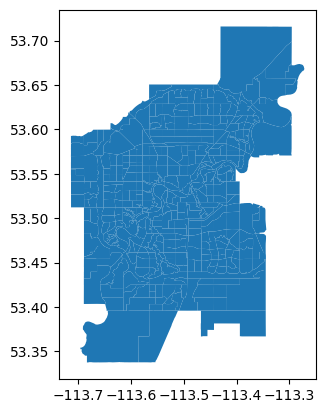

In [17]:
nb_boundaries.plot()

<Axes: >

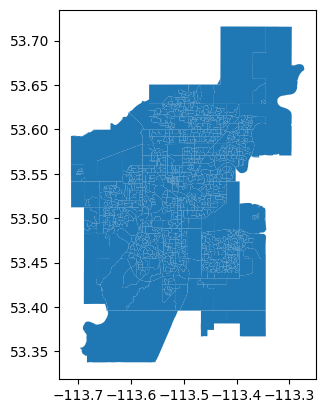

In [18]:
dis_area.plot()

c:\Users\toast\Documents\GitHub\spatial_stats\spatial_stats_py\.venv\lib\site-packages\contextily\tile.py:614: UserWarning: The inferred zoom level of 28 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


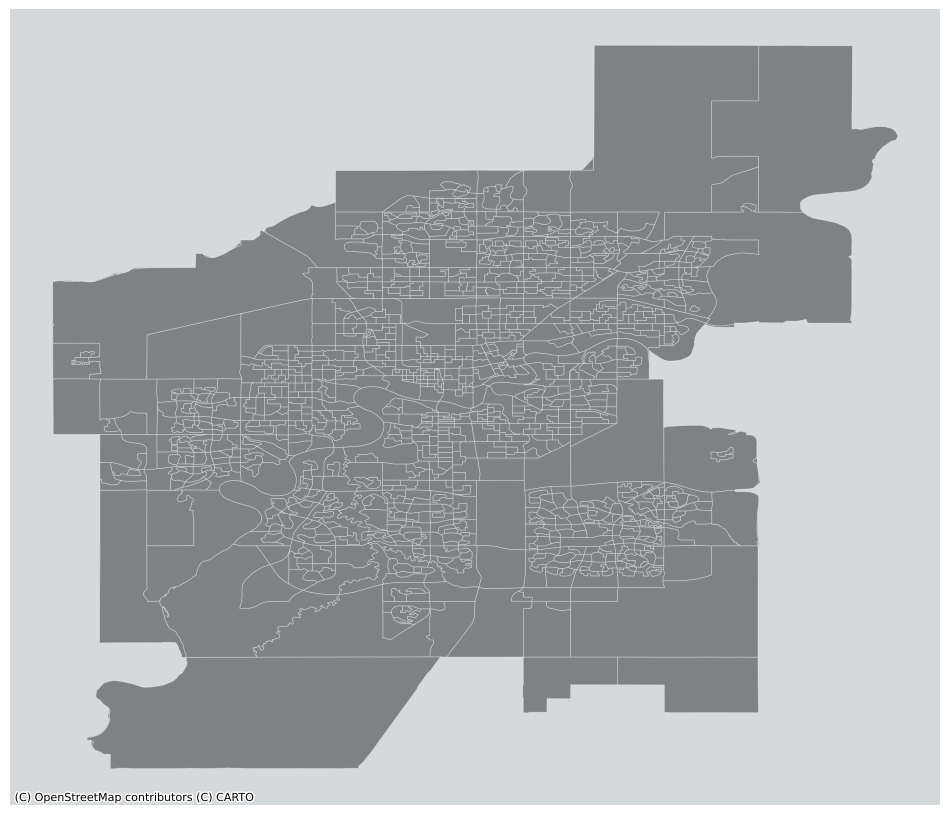

In [19]:
# plot it!
fig, ax = plt.subplots(figsize=(12,12))

dis_area.plot(ax=ax,
         color='black', 
         edgecolor='white',
         lw=0.5,
         alpha=0.4)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

In [39]:
dis_area = dis_area.to_crs('epsg:4326')
join = gpd.sjoin(nb_boundaries, dis_area, how='left')
join.head()

,neighbourh,descriptiv,descriptio,geometry,index_right,fid,da_int,name
0,2260,Evansdale,"Evansdale is named for H.M.E. Evans, Mayor of ...","MULTIPOLYGON (((-113.47970 53.61523, -113.4762...",195,194.0,48110295.0,Griesbach
0,2260,Evansdale,"Evansdale is named for H.M.E. Evans, Mayor of ...","MULTIPOLYGON (((-113.47970 53.61523, -113.4762...",50,49.0,48110350.0,Kilkenny
0,2260,Evansdale,"Evansdale is named for H.M.E. Evans, Mayor of ...","MULTIPOLYGON (((-113.47970 53.61523, -113.4762...",46,45.0,48110346.0,Evansdale
0,2260,Evansdale,"Evansdale is named for H.M.E. Evans, Mayor of ...","MULTIPOLYGON (((-113.47970 53.61523, -113.4762...",49,48.0,48110349.0,Evansdale
0,2260,Evansdale,"Evansdale is named for H.M.E. Evans, Mayor of ...","MULTIPOLYGON (((-113.47970 53.61523, -113.4762...",48,47.0,48110348.0,Evansdale


In [36]:
join.shape

(3136, 8)

In [37]:
join.columns

Index(['neighbourh', 'descriptiv', 'descriptio', 'geometry', 'index_right',
       'fid', 'da_int', 'name'],
      dtype='object')

In [50]:
px.histogram(sub)


ValueError: Plotly Express cannot process wide-form data with columns of different type.

In [51]:
cimd = pd.read_csv(r'data\GeoJson\tab\CIMD_GEOM.csv')

In [52]:
cimd.head()

,DAdguid,PRCDDA,Province,Dissemination area (DA) Population,Situational vulnerability Quintiles,Situational vulnerability Scores,Ethno-cultural composition Quintiles,Ethno-cultural composition Scores,Residential instability Quintiles,Residential instability Scores,Economic dependency Quintiles,Economic dependency Scores,DArplat,DArplong,DApop_2021,DAtdwell_2021,DAurdwell_2021,DArplamx,DArplamy,CTcode,the_geom,CCSNAME,LANDAREA,PRUID,DAUID,_predicate,Boundary Type
0,2021S051248110083,48110083,Alberta,717,5,1.656,5,2.738,5,1.395,1,-0.675,53.567444,-113.383838,638.0,348.0,313.0,4.822695e+06,2.168269e+06,3776,MULTIPOLYGON (((-113.388777518234 53.570538794...,Edmonton,0.2533,48,48110083.0,INTERSECTS,Census Dissemination Area
1,2021S051248110085,48110085,Alberta,574,5,0.889,5,2.182,5,1.475,1,-1.347,53.574096,-113.391049,525.0,252.0,220.0,4.822494e+06,2.169113e+06,2197,MULTIPOLYGON (((-113.38734679662497 53.5708821...,Edmonton,0.1830,48,48110085.0,INTERSECTS,Census Dissemination Area
2,2021S051248110086,48110086,Alberta,370,3,-0.230,3,-0.100,4,0.101,4,0.245,53.573283,-113.396140,385.0,163.0,152.0,4.822151e+06,2.169139e+06,2197,MULTIPOLYGON (((-113.39364159883434 53.5713495...,Edmonton,0.1630,48,48110086.0,INTERSECTS,Census Dissemination Area
3,2021S051248110087,48110087,Alberta,203,1,-0.624,1,-0.877,4,0.285,3,-0.072,53.576344,-113.397003,238.0,109.0,101.0,4.822209e+06,2.169474e+06,2197,MULTIPOLYGON (((-113.39533839479972 53.5775823...,Edmonton,0.0924,48,48110087.0,INTERSECTS,Census Dissemination Area
4,2021S051248110088,48110088,Alberta,322,4,-0.061,1,-0.811,4,0.482,2,-0.416,53.574933,-113.401712,334.0,147.0,135.0,4.821868e+06,2.169431e+06,2197,MULTIPOLYGON (((-113.39837051581337 53.5751028...,Edmonton,0.1256,48,48110088.0,INTERSECTS,Census Dissemination Area


In [53]:
cimd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951 entries, 0 to 950
Data columns (total 27 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   DAdguid                               951 non-null    object 
 1   PRCDDA                                951 non-null    int64  
 2   Province                              951 non-null    object 
 3   Dissemination area (DA) Population    951 non-null    int64  
 4   Situational vulnerability Quintiles   951 non-null    int64  
 5   Situational vulnerability Scores      951 non-null    float64
 6   Ethno-cultural composition Quintiles  951 non-null    int64  
 7   Ethno-cultural composition Scores     951 non-null    float64
 8   Residential instability Quintiles     951 non-null    int64  
 9   Residential instability Scores        951 non-null    float64
 10  Economic dependency Quintiles         951 non-null    int64  
 11  Economic dependency

<Axes: >

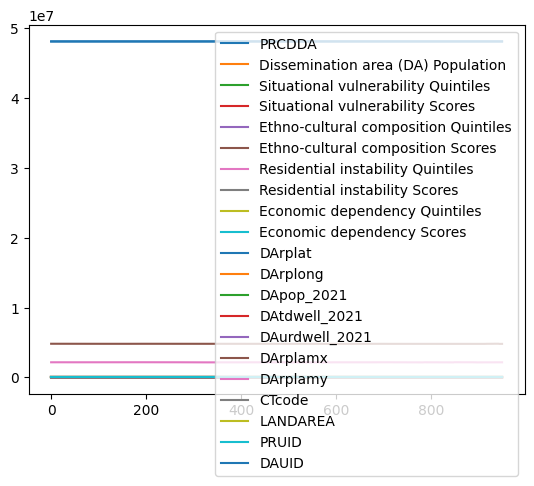

In [54]:
cimd.plot()